Значення нульових кутів в площині H: 20.63, 36.1, 55.58 градусів

Значення max кутів в площині H: 26.36, 43.54, 67.61 градусів


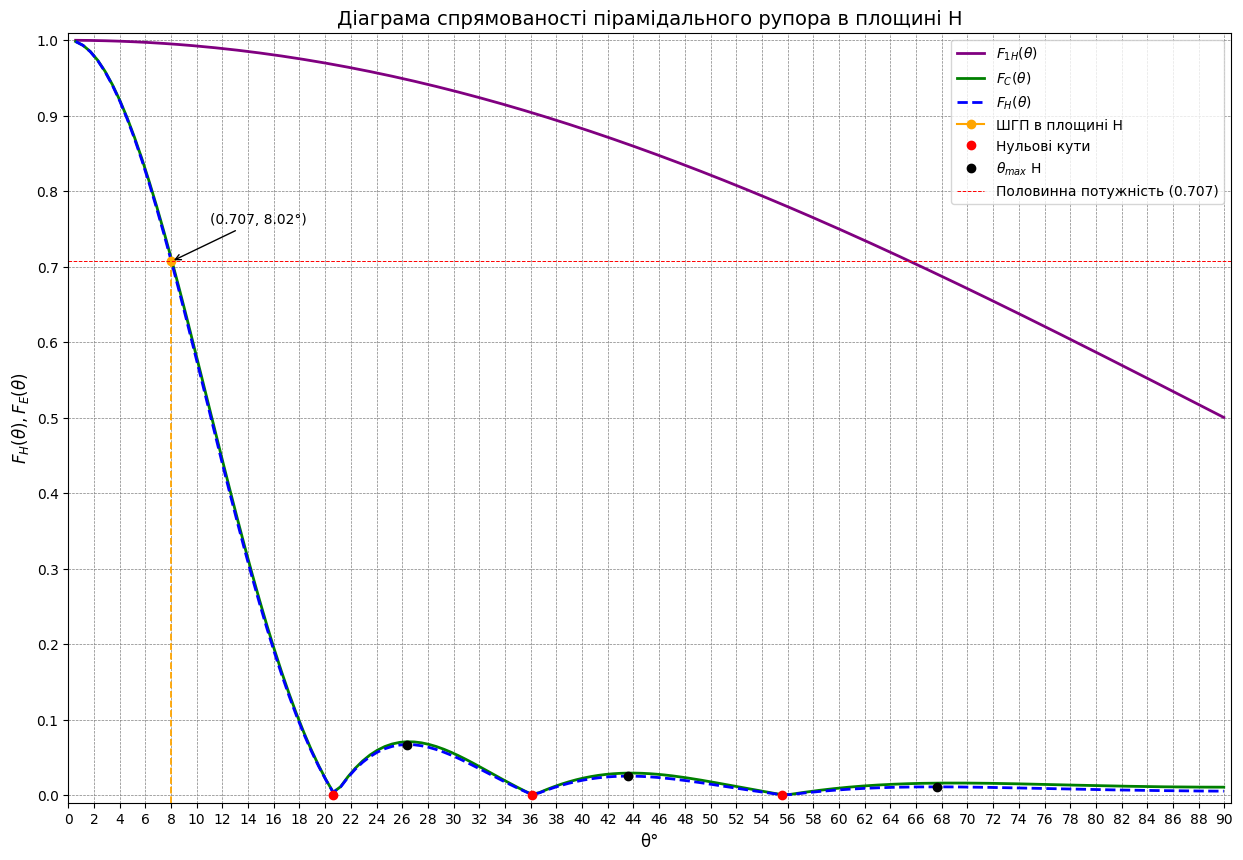

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Вихідні дані
wavelength = 2.6e-02                      # Довжина хвилі в метрах
a_r = 11e-02                              # Розмір рупора по осі a в метрах
b_r = 11e-02                              # Розмір рупора по осі b в метрах
theta = np.arange(0.01, np.pi / 2, 0.01)  # Кути theta для розрахунків

def calculate_FH(theta, wavelength, a_r):
    F1h = []
    FC = []
    FH = []
    for t in theta:
        F1h.append(abs((1 + np.cos(t)) / 2))
        FC.append(abs(np.cos((np.pi * a_r * np.sin(t)) / wavelength) / 
                      (1 - ((2 * a_r * np.sin(t)) / wavelength)**2)))
        FH.append(F1h[-1] * FC[-1])
    return np.array(F1h), np.array(FC), np.array(FH)

def calculate_FE(theta, wavelength, b_r):
    F1e = []
    FC = []
    FE = []
    for t in theta:
        F1e.append(abs((1 + np.cos(t)) / 2))
        FC.append(abs(np.sin((np.pi * b_r * np.sin(t)) / wavelength) / 
                      ((np.pi * b_r * np.sin(t)) / wavelength)))
        FE.append(F1e[-1] * FC[-1])
    return np.array(F1e), np.array(FC), np.array(FE)

# Розрахунки для площин H та E
F1h, FC_H, FH = calculate_FH(theta, wavelength, a_r)
F1e, FC_E, FE = calculate_FE(theta, wavelength, b_r)

# Інтерполюємо для точного визначення ширини головної пелюстки
interp_FH = interp1d(FH, theta, kind='linear', bounds_error=False, fill_value='extrapolate')
interp_FE = interp1d(FE, theta, kind='linear', bounds_error=False, fill_value='extrapolate')

# Ширина головної пелюстки
SGP1 = 2 * np.degrees(interp_FH(0.707))
SGP2 = 2 * np.degrees(interp_FE(0.707))

# Пошук максимумів і мінімумів (циклічний підхід)
def find_peaks_and_troughs(F, theta):
    peaks_x = []
    peaks_y = []
    troughs_x = []
    troughs_y = []

    for i in range(1, len(F) - 1):
        if F[i-1] < F[i] > F[i+1]:  # Максимум
            peaks_x.append(np.round(np.degrees(theta[i]), 2))
            peaks_y.append(F[i])
        elif F[i-1] > F[i] < F[i+1]:  # Мінімум
            troughs_x.append(np.round(np.degrees(theta[i]), 2))
            troughs_y.append(0)  # Нульове значення для мінімумів
    
    return peaks_x, peaks_y, troughs_x, troughs_y

# Знаходимо максимуми і мінімуми для площин H та E
max_x_FH, max_y_FH, min_x_FH, min_y_FH = find_peaks_and_troughs(FH, theta)
max_x_FE, max_y_FE, min_x_FE, min_y_FE = find_peaks_and_troughs(FE, theta)

print(f"Значення нульових кутів в площині H: {', '.join(map(str, min_x_FH))} градусів")
print(f"Значення max кутів в площині H: {', '.join(map(str, max_x_FH))} градусів")

# Візуалізація для площини H
plt.figure(figsize=(15, 10))

# Побудова графіків ДС для H
plt.plot(np.degrees(theta), F1h, label="$ F_{1H}(θ) $", linestyle="solid", color="purple", linewidth=2)
plt.plot(np.degrees(theta), FC_H, label="$ F_{C}(θ) $", linestyle="solid", color="green", linewidth=2)
plt.plot(np.degrees(theta), FH, label="$ F_{H}(θ) $", linestyle="dashed", color="blue", linewidth=2)

# Позначаємо знайдені інтерпольовані точки для ШГП
plt.plot(SGP1 / 2, 0.707, marker="o", color='orange', label="ШГП в площині H")

# Додаємо анотацію для ШГП
plt.annotate(f'(0.707, {SGP1 / 2:.2f}\u00b0)',
             xy=(SGP1 / 2, 0.707),
             xytext=((SGP1 / 2) + 3, 0.757),
             arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)

# Позначаємо нульові кути
plt.plot(min_x_FH, min_y_FH, 'ro', label="Нульові кути")

# Позначаємо максимуми
plt.plot(max_x_FH, max_y_FH, "o", color="black", label="$ \\theta_{max} $ H")

# Додаємо вертикальні та горизонтальні лінії для ШГП
plt.axhline(y=0.707, color="red", linestyle="dashed", label="Половинна потужність (0.707)", linewidth=0.7)
plt.axvline(x=SGP1 / 2, ymin=0, ymax=0.707, color="orange", linestyle="dashed", linewidth=1.3)

# Форматування графіку
plt.xlabel("θ" + '\u00b0', fontsize=12)
plt.ylabel("$ F_H(θ), F_E(θ) $", fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.grid(which='both', linestyle='--', linewidth=0.5, color='gray')
plt.title("Діаграма спрямованості пірамідального рупора в площині H", fontsize=14)

# Налаштування візуалізації осей
plt.xticks(np.arange(0, 100, 2), fontsize=10)
plt.yticks(np.arange(0, 1.2, 0.1), fontsize=10)
plt.ylim(-0.01, 1.01)
plt.xlim(0, 90.5)

plt.show()


Значення нульових кутів в площині E: 13.75, 28.07, 45.26, 71.05 градусів
Значення max кутів в площині E: 19.48, 35.52, 54.43, 86.52 градусів


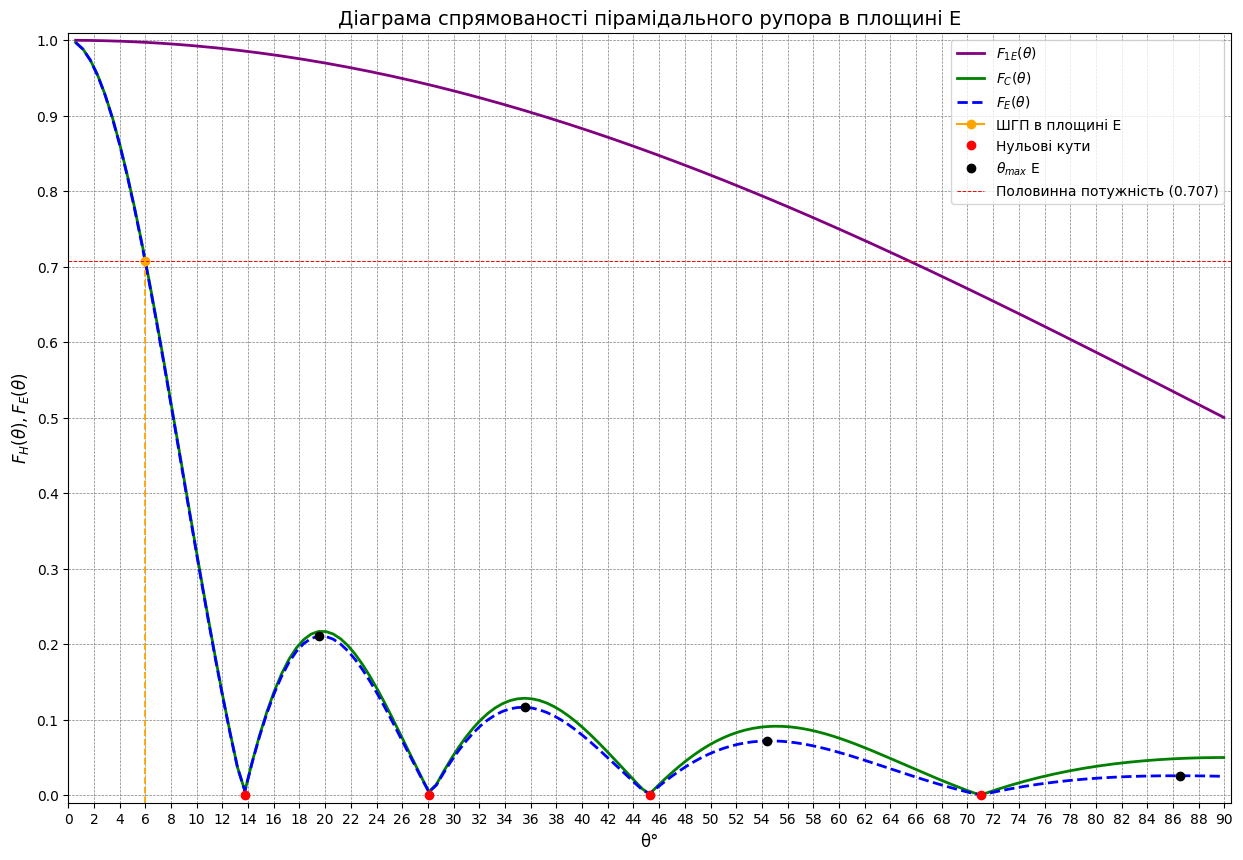

In [3]:
print(f"Значення нульових кутів в площині E: {', '.join(map(str, min_x_FE))} градусів")
print(f"Значення max кутів в площині E: {', '.join(map(str, max_x_FE))} градусів")

# Візуалізація для площини E
plt.figure(figsize=(15, 10))

# Побудова графіків ДС для E
plt.plot(np.degrees(theta), F1e, label="$ F_{1E}(θ) $", linestyle="solid", color="purple", linewidth=2)
plt.plot(np.degrees(theta), FC_E, label="$ F_{C}(θ) $", linestyle="solid", color="green", linewidth=2)
plt.plot(np.degrees(theta), FE, label="$ F_{E}(θ) $", linestyle="dashed", color="blue", linewidth=2)

# Позначаємо знайдені інтерпольовані точки для ШГП
plt.plot(SGP2 / 2, 0.707, marker="o", color='orange', label="ШГП в площині E")

# Позначаємо нульові кути
plt.plot(min_x_FE, min_y_FE, 'ro', label="Нульові кути")

# Позначаємо максимуми
plt.plot(max_x_FE, max_y_FE, "o", color="black", label="$ \\theta_{max} $ E")

# Додаємо вертикальні та горизонтальні лінії для ШГП
plt.axhline(y=0.707, color="red", linestyle="dashed", label="Половинна потужність (0.707)", linewidth=0.7)
plt.axvline(x=SGP2 / 2, ymin=0, ymax=0.707, color="orange", linestyle="dashed", linewidth=1.3)

# Форматування графіку
plt.xlabel("θ" + '\u00b0', fontsize=12)
plt.ylabel("$ F_H(θ), F_E(θ) $", fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.grid(which='both', linestyle='--', linewidth=0.5, color='gray')
plt.title("Діаграма спрямованості пірамідального рупора в площині E", fontsize=14)

# Налаштування візуалізації осей
plt.xticks(np.arange(0, 100, 2), fontsize=10)
plt.yticks(np.arange(0, 1.2, 0.1), fontsize=10)
plt.ylim(-0.01, 1.01)
plt.xlim(0, 90.5)

plt.show()